**Chapter 8 - Decomposition**

My solutions for exercises

<td>
    <a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td>

In [1]:
import time

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

# Ex 9

## Load data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X = mnist['data']
y = mnist['target']

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Trainin Random Forest

In [7]:
rnd_clf = RandomForestClassifier(random_state=42, max_depth=100)

In [8]:
start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()

print(f'{end - start} sec')

36.85130286216736 sec


In [9]:
y_pred = rnd_clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.9705

## Decomposing

In [11]:
pca = PCA(n_components=0.95)

In [12]:
X_train_dec = pca.fit_transform(X_train)

In [13]:
rnd_clf = RandomForestClassifier(random_state=42, max_depth=100)

In [14]:
start = time.time()
rnd_clf.fit(X_train_dec, y_train)
end = time.time()

print(f'{end - start} sec')

90.52150511741638 sec


In [15]:
X_test_dec = pca.transform(X_test)

In [16]:
y_pred = rnd_clf.predict(X_test_dec)

In [17]:
accuracy_score(y_test, y_pred)

0.9481

Model with data after PCA took much more time than without it. Also accuracy score for second example is worser than in first.

# Ex 10

Task: To make a visualisation for t-SNE, PCA, LLE, MDS.

## t-SNE

In [18]:
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X)

D:\Projects\handson_ml\env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Projects\handson_ml\env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


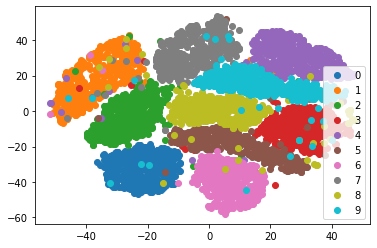

In [19]:
legend = []
for i in '0123456789':
    plt.scatter(X_tsne[y==i][:500, 0], X_tsne[y==i][:500, 1])
    legend.append(i)
plt.legend(legend)

## PCA

In [20]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

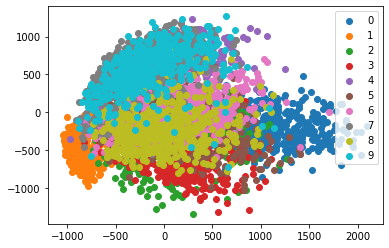

In [21]:
legend = []
for i in '0123456789':
    plt.scatter(X_pca[y==i][:500, 0], X_pca[y==i][:500, 1])
    legend.append(i)
plt.legend(legend)

## LLE

In [5]:
lle = LocallyLinearEmbedding(n_components=2)

X_lle = lle.fit_transform(X[:10000])

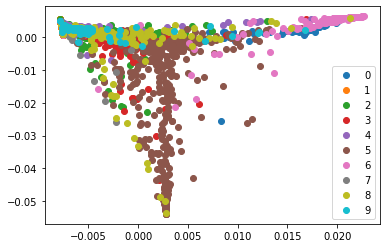

In [13]:
legend = []
for i in '0123456789':
    plt.scatter(X_lle[y[:10000]==i][:500, 0], X_lle[y[:10000]==i][:500, 1])
    legend.append(i)
plt.legend(legend)

## MDS

In [5]:
mds = MDS(n_components=2)

X_mds = mds.fit_transform(X[:10000])

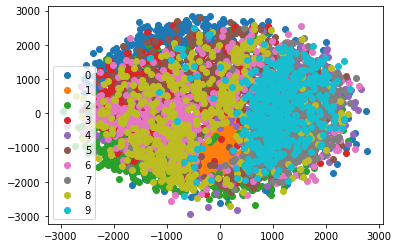

In [6]:
legend = []
for i in '0123456789':
    plt.scatter(X_mds[y[:10000]==i][:500, 0], X_mds[y[:10000]==i][:500, 1])
    legend.append(i)
plt.legend(legend)

t-SNE gave a more better linearly separable data than other decomposition algorithms.